In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import model.dataset as ds
import model.models
import scipy.spatial.distance as ssdist
import librosa
import librosa.display
import matplotlib.pyplot as plt


In [2]:
old = '/Users/tianjunma/Projects/audio_source_separation/multimodal_listener/data/a1_spectrograms/'
new = '/Users/tianjunma/Projects/dataset/a1_spectrograms/'
d = ds.SignalDataset(root_dir=new)

In [3]:
dataloader = torch.utils.data.DataLoader(d, batch_size=32, shuffle=False)

In [4]:
for i, info in enumerate(dataloader):
    print(i)
    aggregate = info['aggregate']
    ground_truths = [gt for gt in info['ground_truths']]
    

# print(d[27*32])
# for i, info in enumerate(dataloader):
#     print(i)
#     if i==26:
#         print(info)

/Users/tianjunma/Projects/dataset/a1_spectrograms/1/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/2/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/3/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/4/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/5/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/6/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/7/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/8/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/9/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/10/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/11/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/12/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/13/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/14/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/15/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/16/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/17/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/18/
2
/

/Users/tianjunma/Projects/dataset/a1_spectrograms/156/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/157/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/158/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/159/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/160/
2
4
/Users/tianjunma/Projects/dataset/a1_spectrograms/161/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/162/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/163/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/164/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/165/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/166/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/167/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/168/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/169/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/170/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/171/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/172/
2
/Users/tianjunma/Projects/dat

2
/Users/tianjunma/Projects/dataset/a1_spectrograms/308/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/309/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/310/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/311/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/312/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/313/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/314/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/315/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/316/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/317/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/318/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/319/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/320/
2
9
/Users/tianjunma/Projects/dataset/a1_spectrograms/321/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/322/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/323/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/324/
2
/Users/tianjunma/Projects/d

/Users/tianjunma/Projects/dataset/a1_spectrograms/464/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/465/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/466/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/467/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/468/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/469/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/470/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/471/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/472/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/473/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/474/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/475/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/476/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/477/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/478/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/479/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/480/
2
14
/Users/tianjunma/Projects/da

18
/Users/tianjunma/Projects/dataset/a1_spectrograms/609/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/610/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/611/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/612/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/613/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/614/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/615/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/616/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/617/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/618/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/619/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/620/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/621/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/622/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/623/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/624/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/625/
2
/Users/tianjunma/Projects/da

2
/Users/tianjunma/Projects/dataset/a1_spectrograms/759/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/760/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/761/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/762/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/763/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/764/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/765/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/766/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/767/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/768/
2
23
/Users/tianjunma/Projects/dataset/a1_spectrograms/769/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/770/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/771/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/772/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/773/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/774/
2
/Users/tianjunma/Projects/dataset/a1_spectrograms/775/
2
/Users/tianjunma/Projects/

TypeError: expected np.ndarray (got NoneType)

In [5]:
def display(spect, sample_rate, y_axis='mel',x_axis='time'):
    mel_spect = librosa.feature.melspectrogram(S=spect)
    db_data = librosa.power_to_db(mel_spect, ref=np.max)
    librosa.display.specshow(db_data, sr=sample_rate, y_axis=y_axis, x_axis=x_axis)

torch.Size([691, 258])


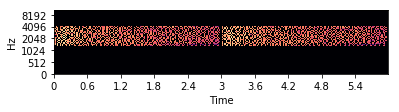

In [18]:
import numpy as np
plt.subplot(3, 1, 1)
print(aggregate[0].size())
display(aggregate.numpy()[0], 22050)

In [13]:
import numpy as np
# agg = np.load('/home/tianjunm/Documents/Projects/dataset/a1_spectrograms/1000/gt/4.npy')

# def concat(m):
#     num_features, nrows, ncols = m.shape
#     result = np.zeros((nrows*num_features, ncols))

#     for i in range(num_features):
#         start = i * nrows;
#         end = (i + 1) * nrows;
#         result[start:end, :] = m[i]
#     return result

# agg_concat = concat(agg)
# aggregate = torch.t(torch.from_numpy(agg_concat))

# # dataloader
# aggregate = aggregate.unsqueeze(0).float()
print(aggregate.size())
bs, seq_len, input_dim = aggregate.size()

net = model.models.Baseline(input_dim, seq_len=seq_len, num_sources=2)

torch.Size([32, 691, 258])


In [14]:
# each batch has a distance matrix [d * d]
# number in each cell represents rank of each cell after sorting
# use (?) algorithm to pick d cells
import numpy as np
# dists = np.array([[[1, 3, 4],
#                    [2, 5, 6],
#                    [7, 8, 9]],
#                   [[5, 9, 8],
#                    [4, 2, 6],
#                    [3, 1, 7]]])
# print(dists)

def get_orders(dists):
    '''
    Args:
        dists: [bs, n_sources n_sources]
    '''
    num_batches = dists.shape[0]
    d = dists.shape[1]
    orders = np.zeros(dists.shape)
    for batch in range(num_batches):
        flattened = np.copy(dists[batch, :, :].reshape(1, -1))
        indices = np.argsort(flattened)
        flattened[:, indices] = np.arange(flattened.size)
        print(flattened.reshape(d, -1))
        print(flattened.reshape(d, -1).astype(int))
        orders[batch, :, :] = flattened.reshape(d, -1)
    
    return orders.astype(int)


def get_matches(orders):
    num_batches = orders.shape[0]
    d = orders.shape[1]
    mask = np.max(orders) + 1
    
    matched_pairs = np.zeros((num_batches, d))
    for i in range(d):
        for batch in range(num_batches):
            m = np.argmin(orders[batch, :, :])
            indices = np.array([(m // d), (m % d)])

            matched_pairs[batch][indices[0]] = indices[1]

            # mask row & col
            orders[batch, indices[0], :] = np.ones(d) * mask
            orders[batch, :, indices[1]] = np.ones(d) * mask
    
    return matched_pairs    

# orders = get_orders(dists)
# print(orders)
# get_seq(orders)

In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [16]:
print(device)

cpu


In [17]:
def reshape(x, seq_len, bs):
    x = [x[:, ts, :] for ts in range(seq_len)]
    x = torch.cat(x).view(seq_len, bs, -1)
    return x


def flatten(ms, batch):
    # n_sources * (seq_len * input_dim)
    return np.array([m[:, batch, :].detach().numpy().flatten() for m in ms])


def calc_dists(preds, gts, device):
    """
    Args:
        preds: n_sources * [seq_len, bs, input_dim]
        gts: n_sources * [seq_len, bs, input_dim]
    
    Returns:
        dists: [bs, n_sources]
    """
    n_sources = len(preds)
    assert n_sources == len(gts)

    bs = preds[0].size()[1]

    # getting the distances from each prediction to all gts
    all_dists = np.zeros((bs, n_sources, n_sources))
    
    for batch in range(bs):
        pred_flattened = flatten(preds, batch)
        gt_flattened = flatten(gts, batch)
        all_dists[batch] = ssdist.cdist(pred_flattened, gt_flattened)
    
#     print(all_dists)
    all_orders = get_orders(all_dists)
    print(all_orders)
    all_matches = get_matches(all_orders)
    

#     print(all_matches)
    dists = torch.zeros(bs, n_sources).to(device)
    
    for batch in range(bs):
        matches = all_matches[batch]
#         print(all_dists[batch])
#         print(matches)
        for src_id in range(n_sources):
            pred = preds[src_id]
            gt_match = gts[int(matches[src_id])]
            # recomputing required to keep track of grads
            dist = torch.norm(torch.squeeze(pred[:, batch, :] - gt_match[:, batch, :], dim=1), 2)
            dists[batch, src_id] = dist

#     for src_id in range(n_sources):
#         pred = preds[src_id]
# #         for batch in range(bs):
# #             dist = torch.norm(torch.squeeze(pred[:, batch, :] - gt[:, batch, :], dim=1), 2)
# #             dists[batch, src_id] = dist
    
#     matches get_seq(diss)
        
    return dists


class MinLoss(nn.Module):
    """Custom loss function #1

    Compare the distance from output with its closest ground truth.

    """
    def __init__(self, device):
        # nn.Module.__init__(self)
        super(MinLoss, self).__init__()
        self.device = device

    def forward(self, predictions, ground_truths):
        """
        Args:
            prediction: num_sources * [seq_len, bs, input_dim]
            ground_truths: num_sources * [bs, seq_len, input_dim] 
        Returns:
            loss: [bs,]
        """
        seq_len = predictions[0].size()[0]
        bs = predictions[0].size()[1]
        # reshape gts into seq_len, bs, input_dim
        gts = [reshape(gt, seq_len, bs) for gt in ground_truths]

        # get distance measure (bs * num_sources)
        dists = calc_dists(predictions, gts, self.device)
        
        loss = torch.sum(dists)
        
        return loss


In [19]:
preds = net(aggregate)

In [20]:
preds[0].size()

torch.Size([691, 32, 258])

In [21]:
criterion = MinLoss(device)

In [22]:
loss = criterion(preds, ground_truths)

AssertionError: 

In [67]:
loss

tensor(2107870.5000, device='cuda:0', grad_fn=<SumBackward0>)

In [65]:
loss.backward()

In [66]:
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
optimizer.step()
preds2 = net(aggregate)

In [68]:
loss2 = criterion(preds2, ground_truths)
loss2

[[[36350.96437999 29521.10932088]
  [36350.63699262 29520.51273838]]

 [[36346.080315   29447.16830141]
  [36346.27510187 29447.79018782]]

 [[36315.9513054  29578.25487447]
  [36316.15794433 29578.28825781]]

 [[36351.21529042 29578.41109664]
  [36351.07756996 29578.21997653]]

 [[36341.08126093 29580.12531119]
  [36341.39591655 29579.6629461 ]]

 [[36321.7483926  29441.37101397]
  [36321.65990421 29441.36866038]]

 [[36328.28371153 29516.21178883]
  [36328.59821348 29516.80296633]]

 [[36346.82227578 29457.93457161]
  [36347.49076438 29457.63527482]]

 [[36331.01925345 29549.84642059]
  [36331.88643813 29549.96546081]]

 [[36349.72786053 29505.87464815]
  [36349.87985068 29505.92352079]]

 [[36308.87534222 29529.6131852 ]
  [36309.5413424  29529.65153648]]

 [[36318.02847037 29538.97988932]
  [36318.51562363 29538.61102112]]

 [[36348.1849275  29455.70799655]
  [36348.48093283 29455.46173102]]

 [[36345.11974964 29597.26365491]
  [36345.54902772 29596.87524299]]

 [[36343.67892849 29

tensor(2107392., device='cuda:0', grad_fn=<SumBackward0>)

In [16]:
print(len(ground_truths))
print(ground_truths[0].size())
gt = net.reshape(ground_truths[0])
print(torch.squeeze(gt[:, 0, :], dim=1).size())

2
torch.Size([32, 173, 1025])
torch.Size([173, 1025])


In [6]:
# print(aggregate[:, 0])
# agg = torch.t(aggregate)
# print(agg[0, :])
print(aggregate.size())
print(aggregate[1, 1, :])
seq_len = aggregate.size()[1]
aggs = [aggregate[:, t, :] for t in range(seq_len)]
x = torch.cat(aggs).view(173, bs, -1)
print(x[1, 1, :])
print(x.size())

torch.Size([32, 173, 1025])
tensor([1.4197e-19, 9.8981e-19, 1.4690e-17,  ..., 8.6916e-19, 1.9786e-18,
        1.6256e-18])
tensor([1.4197e-19, 9.8981e-19, 1.4690e-17,  ..., 8.6916e-19, 1.9786e-18,
        1.6256e-18])
torch.Size([173, 32, 1025])


In [81]:
# from scipy.spatial import distance
a = np.arange(15).reshape(3,5)
b = np.random.randint(5, size=(3, 5))
# print(a)
# print(b)
# a.reshape(1, 5) - b.reshape(5, 1)

# distance.cdist(a, b)

# a.flatten()


t = torch.arange(24).view(2, 3, -1)

print(t)
print(t[:, 0, :])
print(t[:, 0, :].numpy().flatten())

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])
tensor([[ 0,  1,  2,  3],
        [12, 13, 14, 15]])
[ 0  1  2  3 12 13 14 15]


In [31]:


# m = np.zeros((2, 3, 4))
# m[0] = np.arange(12).reshape(3,4)
# m[1] = np.arange(12).reshape(3,4) * 2

# m_c = concat(m)

def check(m_c, m):
    for i in range(m_c.shape[0]):
        for j in range(m_c.shape[1]):
            batch = i // m.shape[1]
            ii = i % m.shape[1]
            assert(m_c[i][j] == m[batch][ii][j])
    print("passed")

check(agg_concat, agg)

passed
